<a href="https://colab.research.google.com/github/NIKHIL4053/Amazon_Sales_Data/blob/main/Amazon_Sales_Data_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Amazon_Sales_data.csv')

# New Section

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   

         Total Cost  Total Profit  
count  1.000000e+02  1.000000e+02  
mean   9.318057e+05  4.416820e+05  
std    1.083938e+06  4.385379e+05  
min    3.612240e+03  1.258020e+03  
25%    1.688680e+05  1.214436e+05  
50%    3.635664e+05  2.907680e+05  
75%    1.613870e+06  6.358288e+05  
max    4.509794

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [ ]:
# Sales trend analysis
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])



In [ ]:
# Extract year and month from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [ ]:
# Aggregate sales data by month
monthly_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum()

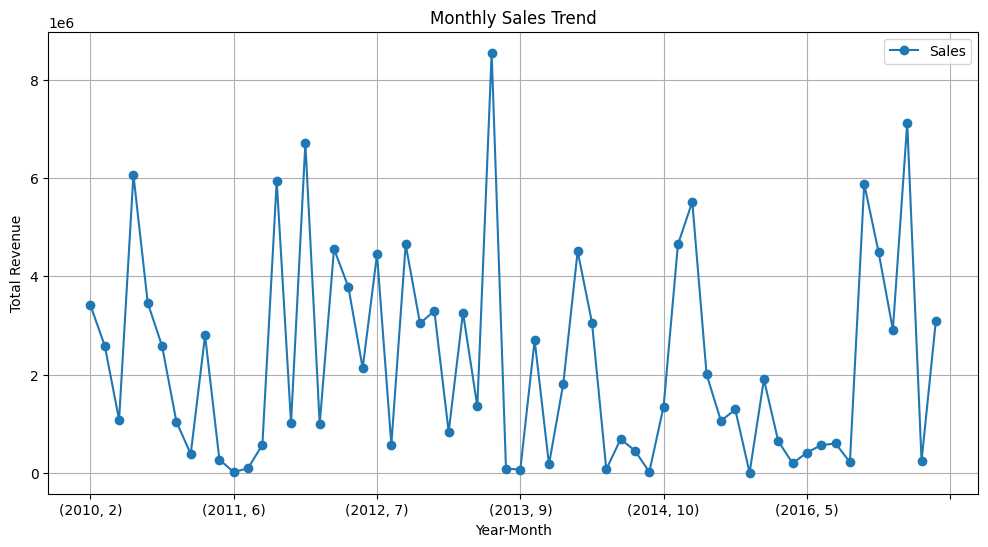

In [ ]:
# Time series analysis of sales and profit trends
# Monthly sales trend
monthly_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', label='Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend()
plt.show()

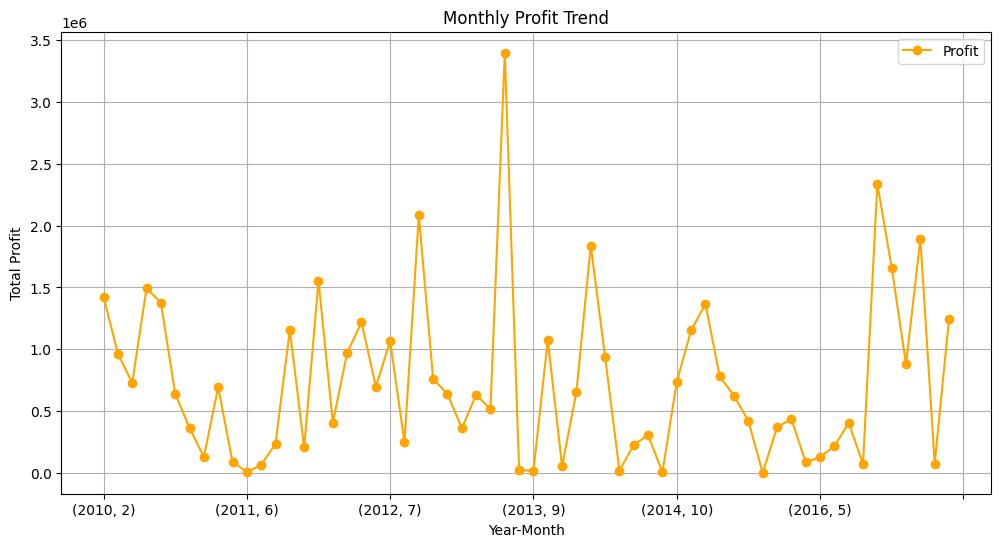

In [ ]:
# Monthly profit trend
monthly_profit = data.groupby(['Year', 'Month'])['Total Profit'].sum()
plt.figure(figsize=(12, 6))
monthly_profit.plot(kind='line', marker='o', color='orange', label='Profit')
plt.title('Monthly Profit Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.legend()
plt.show()


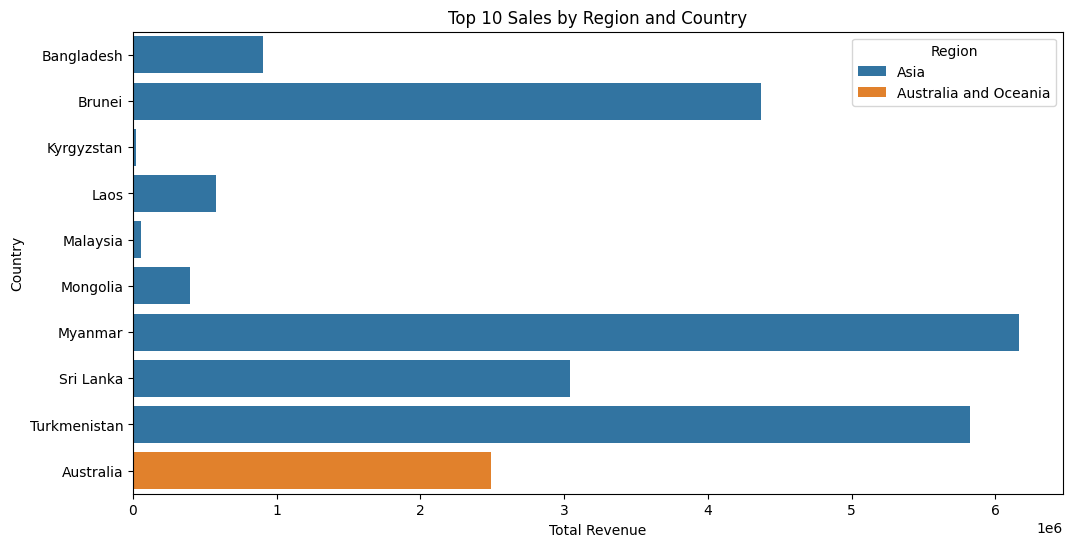

In [ ]:
# Sales by Region and Country
sales_by_region_country = data.groupby(['Region', 'Country']).agg({'Total Revenue': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Revenue', y='Country', hue='Region', data=sales_by_region_country.head(10))
plt.title('Top 10 Sales by Region and Country')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.legend(title='Region')
plt.show()


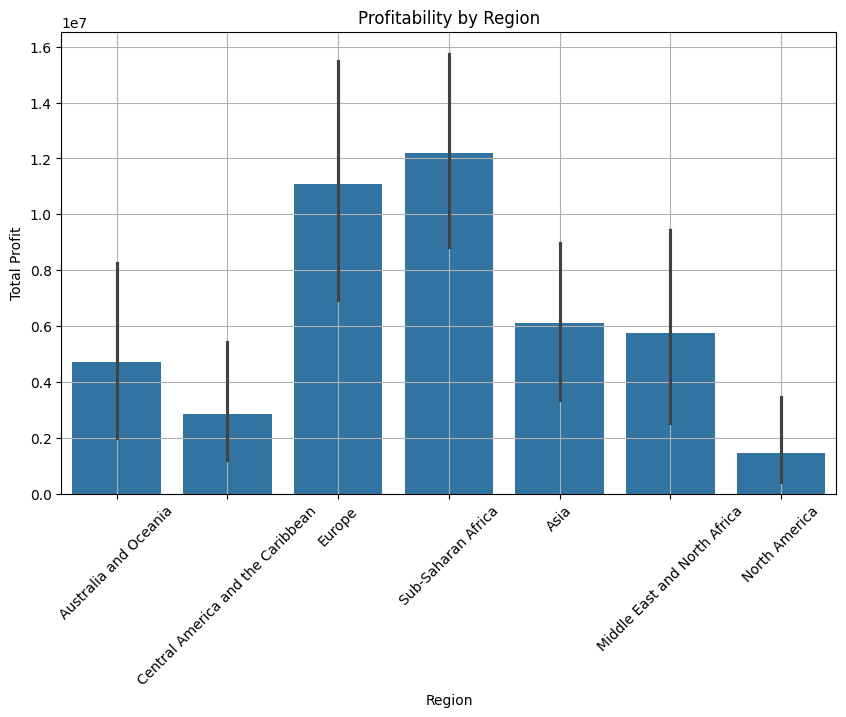

In [ ]:
# Profitability analysis by region
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Region', y='Total Profit', estimator=sum)
plt.title('Profitability by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

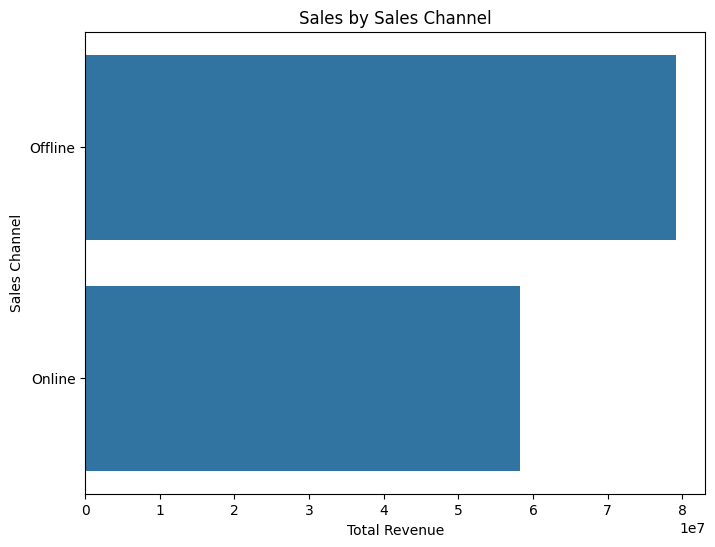

In [ ]:
# Sales by Sales Channel
sales_by_sales_channel = data.groupby('Sales Channel').agg({'Total Revenue': 'sum'}).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Total Revenue', y='Sales Channel', data=sales_by_sales_channel)
plt.title('Sales by Sales Channel')
plt.xlabel('Total Revenue')
plt.ylabel('Sales Channel')
plt.show()

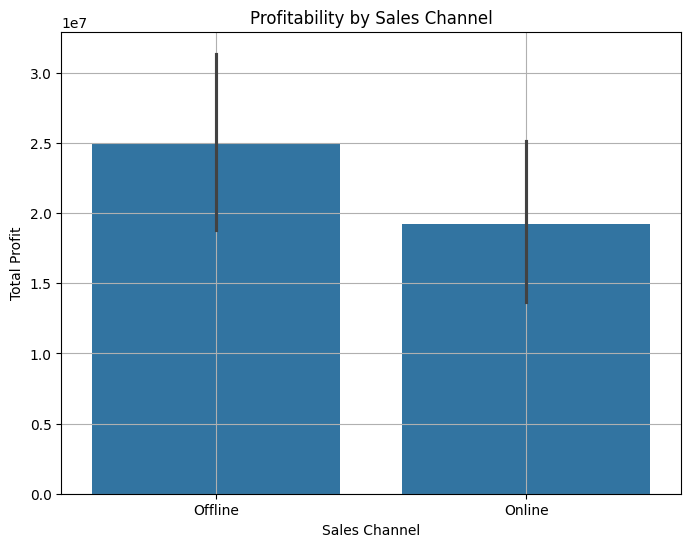

In [ ]:
# Profitability analysis by Sales Channel
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Sales Channel', y='Total Profit', estimator=sum)
plt.title('Profitability by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

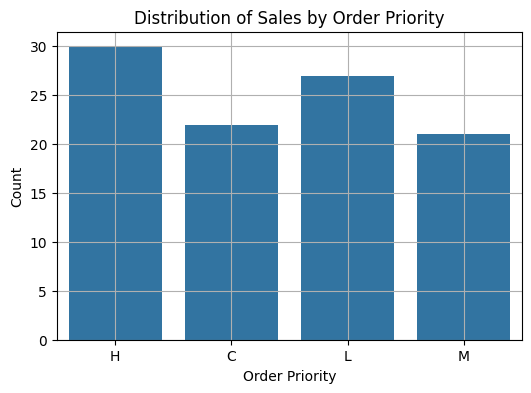

In [ ]:
# Distribution of sales by Order Priority
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Order Priority')
plt.title('Distribution of Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.grid(True)
plt.show()


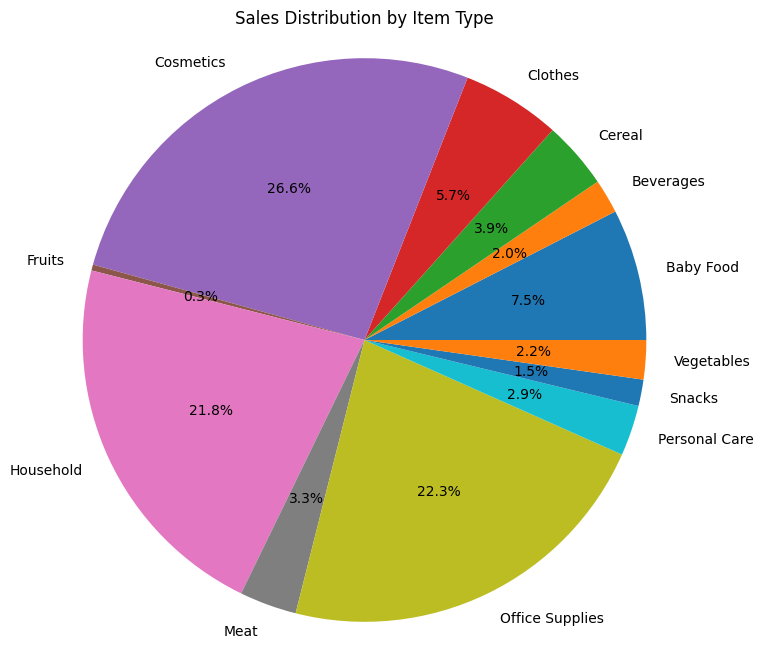

In [ ]:
#Sales by Item Type
sales_by_item_type = data.groupby('Item Type').agg({'Total Revenue': 'sum'}).reset_index()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_item_type['Total Revenue'], labels=sales_by_item_type['Item Type'], autopct='%1.1f%%')
plt.title('Sales Distribution by Item Type')
plt.axis('equal')
plt.show()

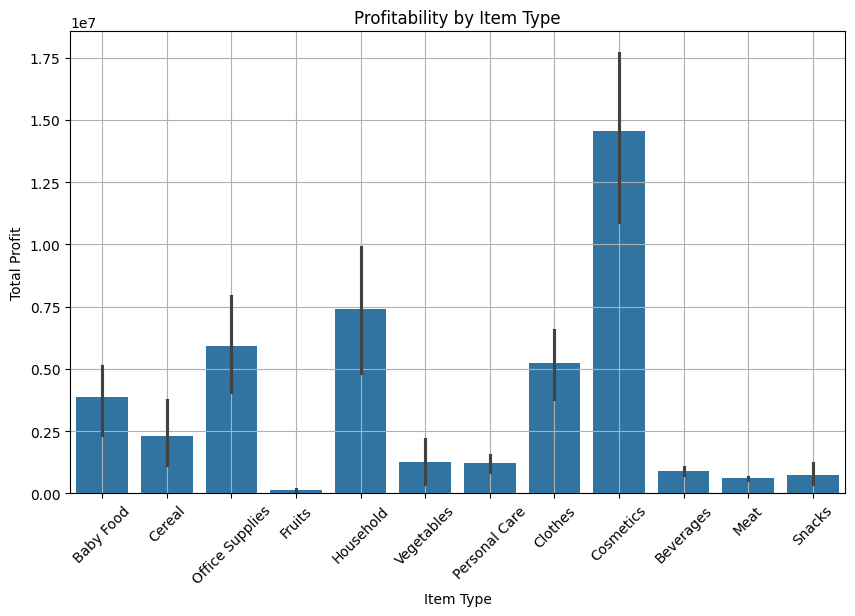

In [ ]:
# Profitability analysis by Item Type
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Item Type', y='Total Profit', estimator=sum)
plt.title('Profitability by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

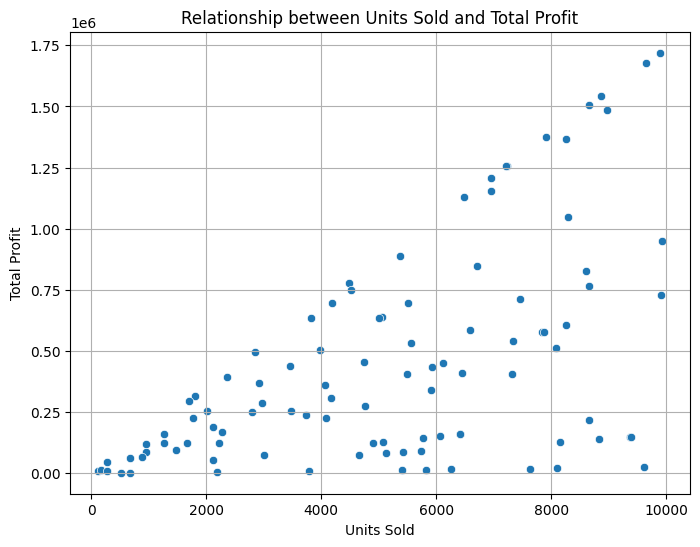

In [ ]:
# Relationship between units sold and total profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Units Sold', y='Total Profit')
plt.title('Relationship between Units Sold and Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

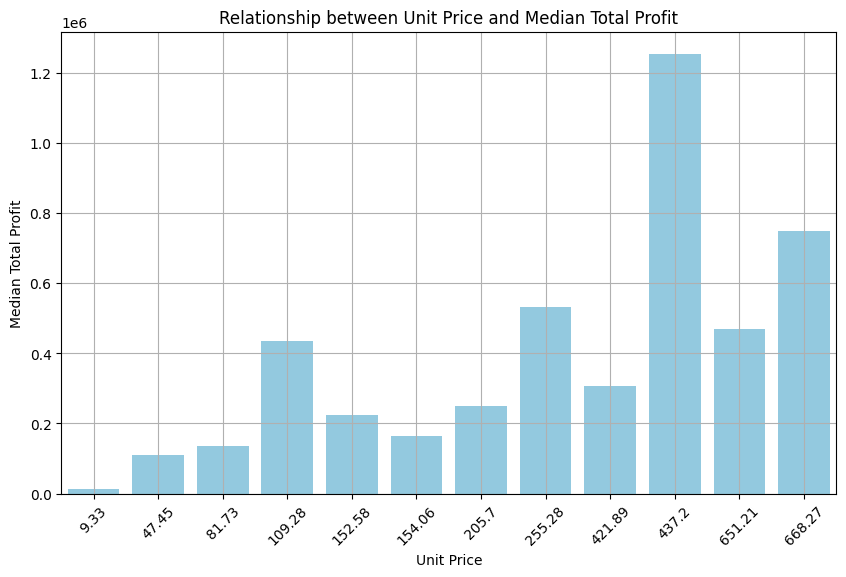

In [ ]:
# Group the data by unit price and calculate median total profit
unit_price_profit = data.groupby('Unit Price')['Total Profit'].median().reset_index()

# Plot bar diagram
plt.figure(figsize=(10, 6))
sns.barplot(data=unit_price_profit, x='Unit Price', y='Total Profit', color='skyblue')
plt.title('Relationship between Unit Price and Median Total Profit')
plt.xlabel('Unit Price')
plt.ylabel('Median Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

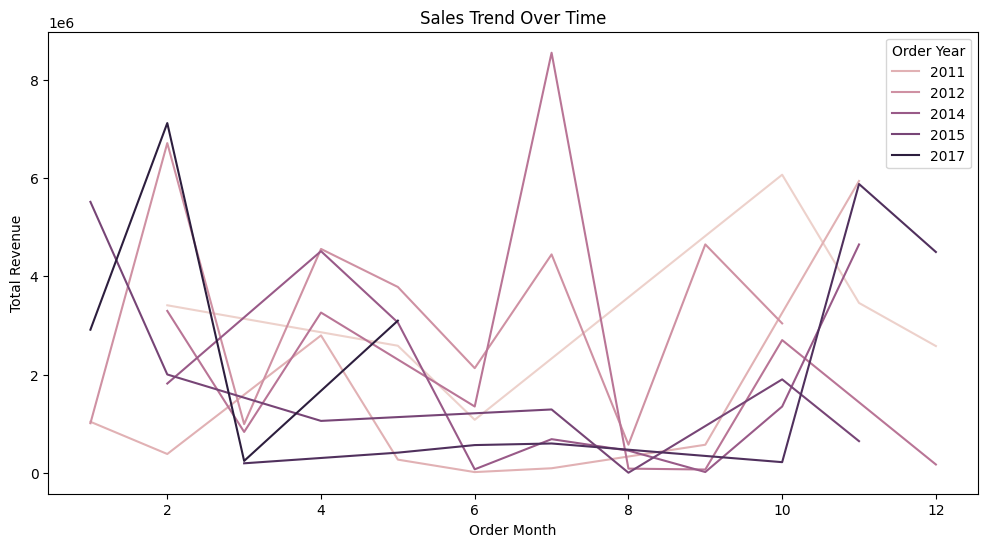

In [ ]:
# Sales Trend Over Time
sales_trend_over_time = data.groupby(['Year', 'Month']).agg({'Total Revenue': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Revenue', hue='Year', data=sales_trend_over_time)
plt.title('Sales Trend Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')
plt.legend(title='Order Year')
plt.show()


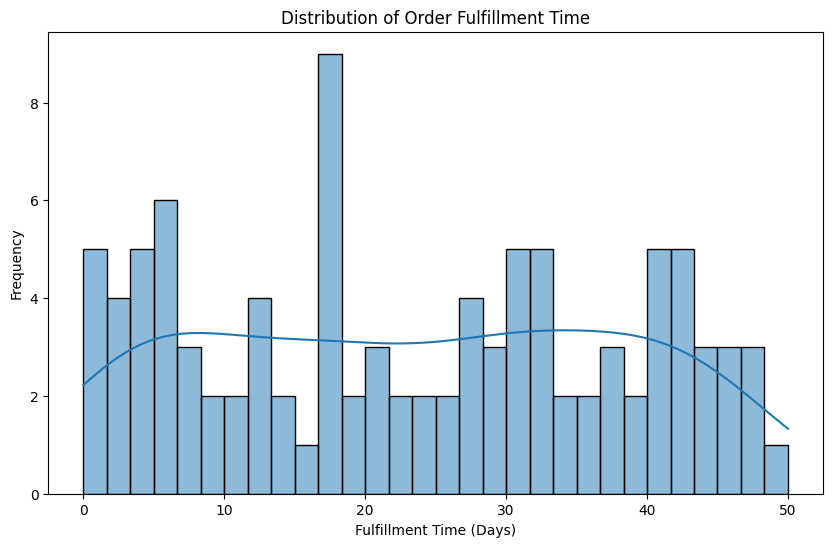

In [ ]:
# Order Fulfillment Time
data['Fulfillment Time'] = (data['Ship Date'] - data['Order Date']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(data['Fulfillment Time'], bins=30, kde=True)
plt.title('Distribution of Order Fulfillment Time')
plt.xlabel('Fulfillment Time (Days)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-21-11b1f986977c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


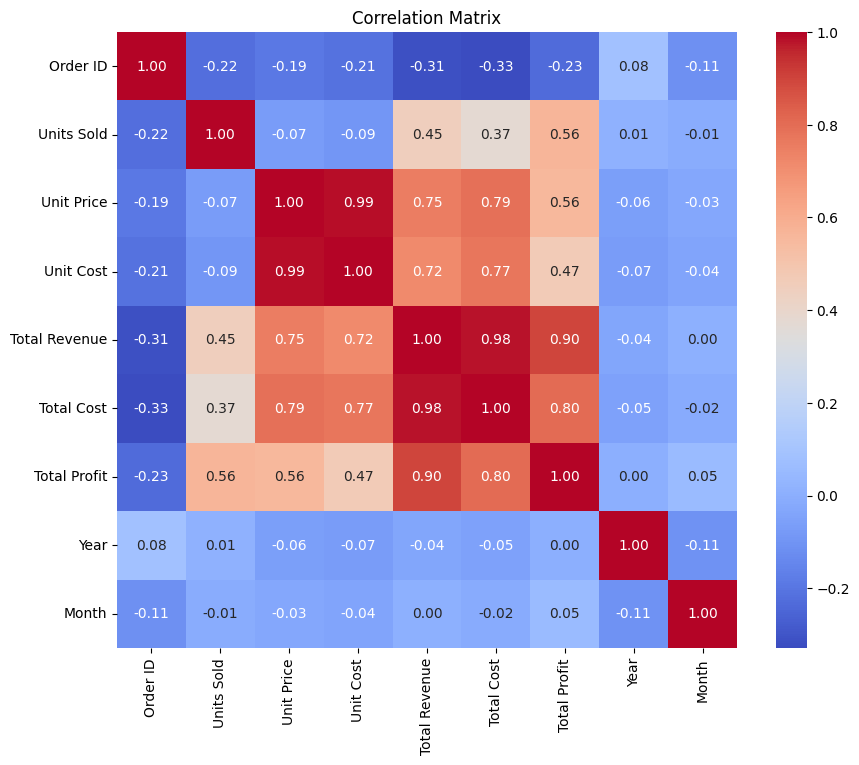

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
